In [113]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [114]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')
labels = train['label'].values
train.drop('label', axis = 1, inplace = True)

images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

from sklearn.model_selection import train_test_split

In [115]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,Input


In [116]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [117]:
batch_size = 128
num_classes = 24
epochs = 50
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)

In [118]:
from keras.layers.normalization import BatchNormalization
import tensorflow as tf

In [123]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu',input_shape=(28, 28 ,3)))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [124]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
__________

In [127]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 60s 3ms/step - loss: 2.5578 - acc: 0.2240 - val_loss: 1.6237 - val_acc: 0.4588
Epoch 2/10
19218/19218 [==============================] - 58s 3ms/step - loss: 1.1794 - acc: 0.6035 - val_loss: 0.8265 - val_acc: 0.7207
Epoch 3/10
19218/19218 [==============================] - 55s 3ms/step - loss: 0.6556 - acc: 0.7789 - val_loss: 0.5202 - val_acc: 0.8249
Epoch 4/10
19218/19218 [==============================] - 53s 3ms/step - loss: 0.4151 - acc: 0.8639 - val_loss: 0.3106 - val_acc: 0.8893
Epoch 5/10
19218/19218 [==============================] - 55s 3ms/step - loss: 0.2496 - acc: 0.9232 - val_loss: 0.2091 - val_acc: 0.9354
Epoch 6/10
19218/19218 [==============================] - 56s 3ms/step - loss: 0.1585 - acc: 0.9534 - val_loss: 0.1426 - val_acc: 0.9548
Epoch 7/10
19218/19218 [==============================] - 49s 3ms/step - loss: 0.0974 - acc: 0.9737 - val_loss: 0.0784 - val_acc:

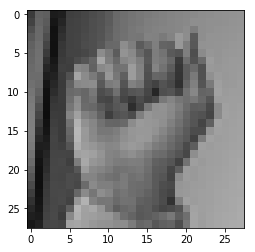

In [128]:
plt.imshow(x_train[0])
plt.show()

In [129]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28)
test_images = np.stack((test_images,)*3, axis=-1)
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())



0.7915504740658115

In [57]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.865867261572783

In [133]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras.models import load_model
from keras import backend as K
import os.path as osp
import tensorflow as tf
import os

model = load_model("model.h5")
nb_classes = 1 # The number of output nodes in the model
prefix_output_node_names_of_final_network = 'output_node'

K.set_learning_phase(0)

pred = [None]*nb_classes
pred_node_names = [None]*nb_classes
for i in range(nb_classes):
    pred_node_names[i] = prefix_output_node_names_of_final_network+str(i)
    pred[i] = tf.identity(model.output[i], name=pred_node_names[i])
print('output nodes names are: ', pred_node_names)

sess = K.get_session()
output_fld = 'tensorflow_model/'
if not os.path.isdir(output_fld):
    os.mkdir(output_fld)
output_graph_name = "saved_model_path" + '.pb'
output_graph_suffix = '_inference'

constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)
graph_io.write_graph(constant_graph, output_fld, output_graph_name, as_text=False)
print('saved the constant graph (ready for inference) at: ', osp.join(output_fld, output_graph_name))

output nodes names are:  ['output_node0']
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.
saved the constant graph (ready for inference) at:  tensorflow_model/saved_model_path.pb


In [134]:
def print_graph_nodes(filename):
    import tensorflow as tf
    g = tf.GraphDef()
    g.ParseFromString(open(filename, 'rb').read())
    print()
    print(filename)
    print("=======================INPUT=========================")
    print([n for n in g.node if n.name.find('input') != -1])
    print("=======================OUTPUT========================")
    print([n for n in g.node if n.name.find('output') != -1])
    print("===================KERAS_LEARNING=====================")
    print([n for n in g.node if n.name.find('keras_learning_phase') != -1])
    print("======================================================")
    print()

In [135]:
print_graph_nodes("C:\\Users\\mirza914\\Downloads\\acad_4_2\\SDPD\\Project\\tensorflow_model\\saved_model_path.pb")


C:\Users\mirza914\Downloads\acad_4_2\SDPD\Project\tensorflow_model\saved_model_path.pb
=======================INPUT=========================
[name: "dropout_1/keras_learning_phase/input"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_BOOL
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_BOOL
      tensor_shape {
      }
      bool_val: false
    }
  }
}
, name: "conv2d_13_input_1"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: -1
      }
      dim {
        size: 28
      }
      dim {
        size: 28
      }
      dim {
        size: 3
      }
    }
  }
}
]
=======================OUTPUT========================
[name: "output_node0"
op: "Identity"
input: "strided_slice"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
]
===================KERAS_LEARNING=====================
[name: "dropout_1/keras_learning_phase/input"
op: "Const"
attr {
  key: "dtype"
  v

In [131]:
from keras.models import save_model,load_model

In [132]:
save_model(model=model,filepath='model.h5')

In [79]:
new_model=load_model('model.h5')